# **Question 1**

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image = Image.open("ruler.512.tiff")
image_array = np.array(image)

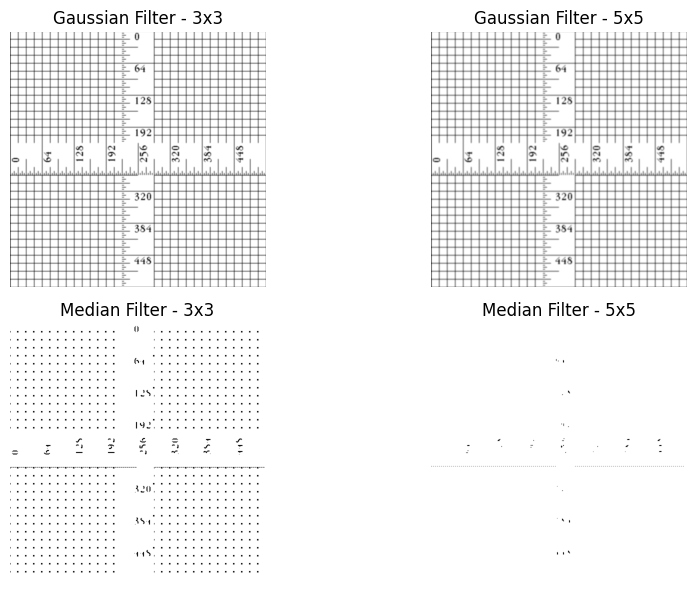

In [ ]:
def gaussian_kernel(kernel_size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/ (2*np.pi*sigma**2)) * np.exp(-((x - (kernel_size-1)/2)**2 + (y - (kernel_size-1)/2)**2) / (2*sigma**2)), (kernel_size, kernel_size))
    kernel /= np.sum(kernel)
    return kernel

def median_filter(image, kernel_size):
    padd = kernel_size // 2
    padded_image = padding(image, padd, padd)
    height, width = padded_image.shape
    filtered_image = np.zeros((height - 2*padd, width - 2*padd), dtype=np.uint8)
    for i in range(padd, height - padd):
        for j in range(padd, width - padd):
            neighborhood = image[i - padd:i + padd + 1, j - padd:j + padd + 1]
            median_value = np.median(neighborhood)
            filtered_image[i - padd, j - padd] = median_value
    return filtered_image

def padding(image, pad_height, pad_width):
    padded_image = np.zeros((image.shape[0] + 2 * pad_height, image.shape[1] + 2 * pad_width))
    padded_image[pad_height:pad_height + image.shape[0], pad_width:pad_width + image.shape[1]] = image
    return padded_image

def convolve(image, kernel):
    height, weight = image.shape
    padded_image = padding(image, kernel.shape[0]//2, kernel.shape[1]//2)
    output = np.zeros((height, weight))
    for i in range(height):
        for j in range(weight):
            output[i, j] = np.sum(padded_image[i: i + kernel.shape[0], j: j + kernel.shape[1]] * kernel)
    output = np.clip(output, 0, 255)
    return output

kernel_3x3 = gaussian_kernel(3, 1)
filtered_gaussian_3x3 = convolve(image_array, kernel_3x3)

kernel_5x5 = gaussian_kernel(5, 1)
filtered_gaussian_5x5 = convolve(image_array, kernel_5x5)

filtered_median_3x3 = median_filter(image_array, 3)
filtered_median_5x5 = median_filter(image_array, 5)

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].set_title("Gaussian Filter - 3x3")
axs[0, 0].imshow(filtered_gaussian_3x3, cmap='gray')
axs[0, 0].axis('off')

axs[0, 1].set_title("Gaussian Filter - 5x5")
axs[0, 1].imshow(filtered_gaussian_5x5, cmap='gray')
axs[0, 1].axis('off')

axs[1, 0].set_title("Median Filter - 3x3")
axs[1, 0].imshow(filtered_median_3x3, cmap='gray')
axs[1, 0].axis('off')

axs[1, 1].set_title("Median Filter - 5x5")
axs[1, 1].imshow(filtered_median_5x5, cmap='gray')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


# **Question 2**

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open("tank.tiff")
image_array = np.array(image)

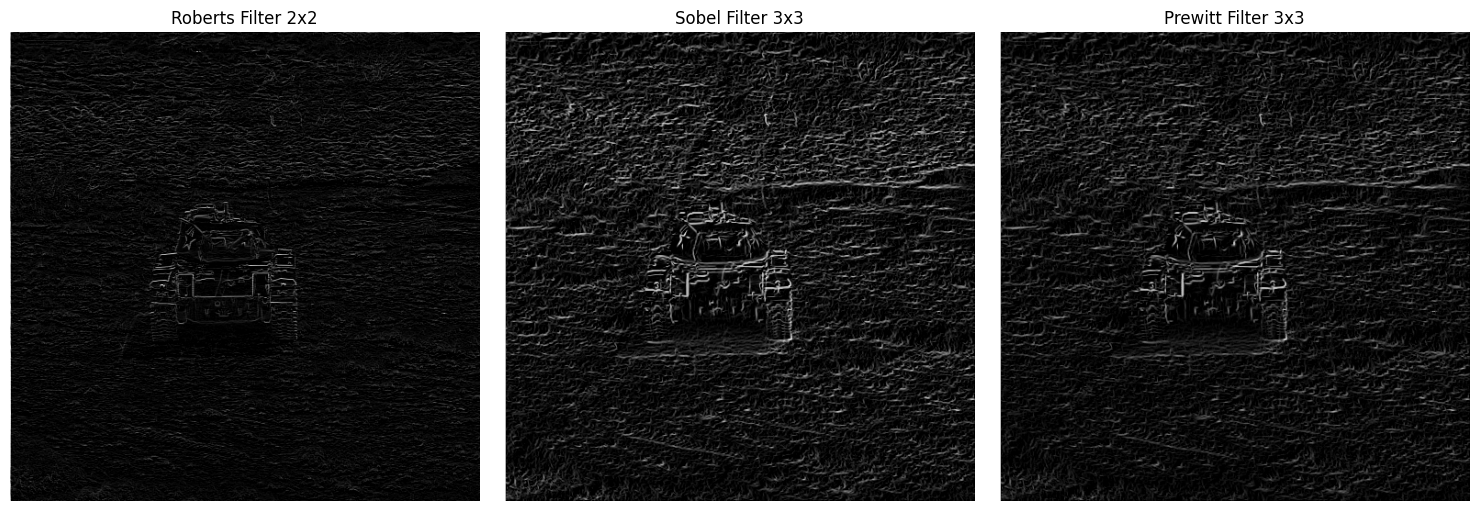

In [ ]:
def roberts(image):
    roberts_cross_x = np.array([[0, 1],
                               [-1, 0]])
    roberts_cross_y = np.array([[1, 0],
                                [0, -1]])

    vertical_edges = convolve(image, roberts_cross_x)
    horizontal_edges = convolve(image, roberts_cross_y)
    return np.hypot(horizontal_edges, vertical_edges)

def sobel(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])
    vertical_edges = convolve(image, sobel_x)
    horizontal_edges = convolve(image, sobel_y)
    return np.hypot(horizontal_edges, vertical_edges)

def prewitt(image):
    prewitt_x = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])
    vertical_edges = convolve(image, prewitt_x)
    horizontal_edges = convolve(image, prewitt_y)
    return np.hypot(horizontal_edges, vertical_edges)

if image_array.ndim == 3:
    image_array = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

roberts_image = roberts(image_array)
sobel_image = sobel(image_array)
prewitt_image = prewitt(image_array)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(roberts_image, cmap='gray')
axs[0].set_title("Roberts Filter 2x2")
axs[0].axis('off')

axs[1].imshow(sobel_image, cmap='gray')
axs[1].set_title("Sobel Filter 3x3")
axs[1].axis('off')

axs[2].imshow(prewitt_image, cmap='gray')
axs[2].set_title("Prewitt Filter 3x3")
axs[2].axis('off')

plt.tight_layout()
plt.show()

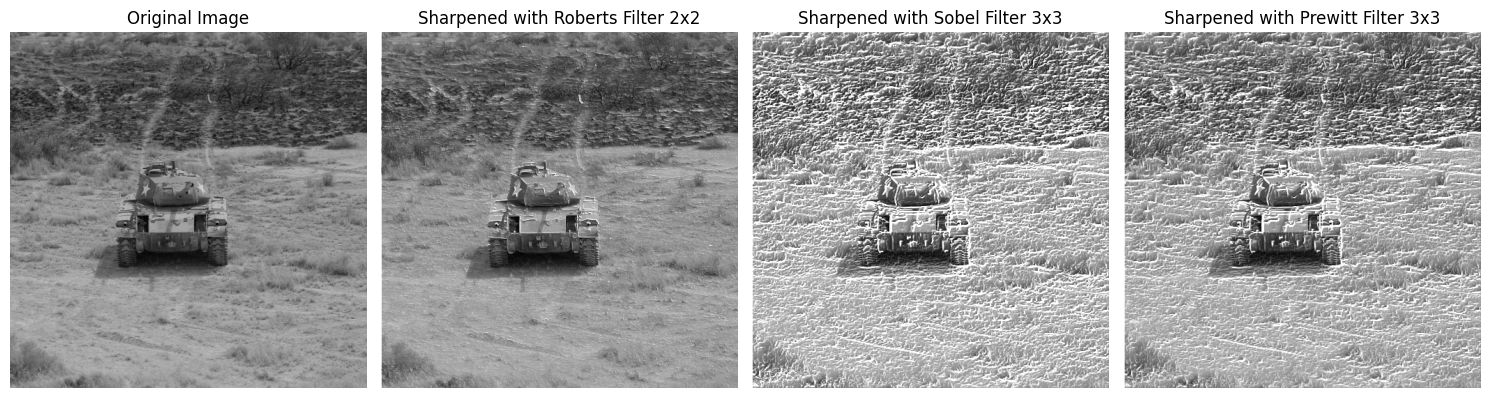

In [ ]:
def sharpen_with_filter(image, edge_image):
    return np.clip(image + 1.5*edge_image, 0, 255)

sharpened_roberts = sharpen_with_filter(image, roberts_image)
sharpened_sobel = sharpen_with_filter(image, sobel_image)
sharpened_prewitt = sharpen_with_filter(image, prewitt_image)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(image_array, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(sharpened_roberts, cmap='gray')
axs[1].set_title("Sharpened with Roberts Filter 2x2")
axs[1].axis('off')

axs[2].imshow(sharpened_sobel, cmap='gray')
axs[2].set_title("Sharpened with Sobel Filter 3x3")
axs[2].axis('off')

axs[3].imshow(sharpened_prewitt, cmap='gray')
axs[3].set_title("Sharpened with Prewitt Filter 3x3")
axs[3].axis('off')

plt.tight_layout()
plt.show()

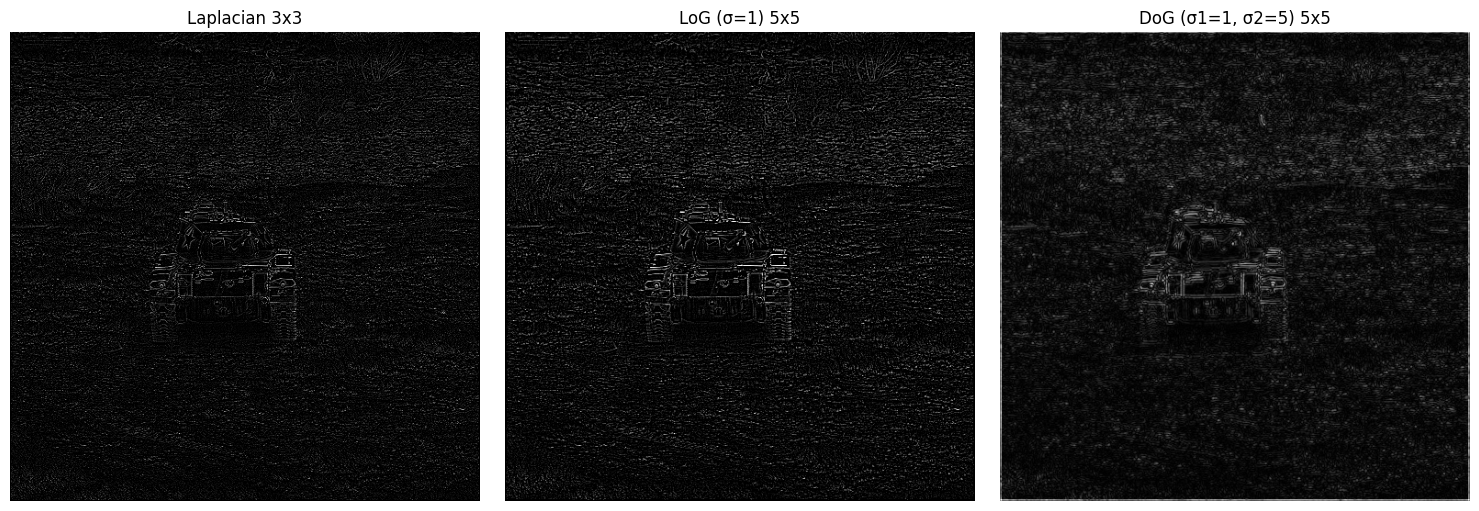

In [ ]:
def gaussian_filter(image, sigma, size):
    kernel = gaussian_kernel(size, sigma)
    return convolve(image, kernel)

def laplacian(image):
    laplace_kernel = np.array([
        [0,  1, 0],
        [1, -4, 1],
        [0,  1, 0]
    ])
    return convolve(image, laplace_kernel)

def log_kernel(sigma, size):
    radius = size // 2
    kernel = np.zeros((size, size), dtype=float)
    coeff = -1 / (np.pi * sigma**4)

    for i in range(-radius, radius+1):
        for j in range(-radius, radius+1):
            val1 = (1 - (i**2 + j**2) / (2 * sigma**2))
            val2 = np.exp(-(i**2 + j**2) / (2 * sigma**2))
            kernel[i + radius, j + radius] = coeff * val1 * val2
    kernel -= kernel.mean()
    return kernel
def log(image, sigma, size):
    l_kernel = log_kernel(sigma, size)
    log_image = convolve(image, l_kernel)
    return log_image

def dog(image, sigma1, sigma2, size):
    gaussian1 = gaussian_filter(image, sigma1, size)
    gaussian2 = gaussian_filter(image, sigma2, size)
    dog_image = abs(gaussian2 - gaussian1)
    return dog_image

if image_array.ndim == 3:
    image_array = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

laplacian_image = laplacian(image_array)
log_image = log(image_array, 0.5, 5)
dog_image = dog(image_array, 1, 5, 5)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(laplacian_image, cmap='gray')
axs[0].set_title("Laplacian 3x3")
axs[0].axis('off')

axs[1].imshow(log_image, cmap='gray')
axs[1].set_title("LoG (σ=1) 5x5")
axs[1].axis('off')

axs[2].imshow(dog_image, cmap='gray')
axs[2].set_title("DoG (σ1=1, σ2=5) 5x5")
axs[2].axis('off')

plt.tight_layout()
plt.show()

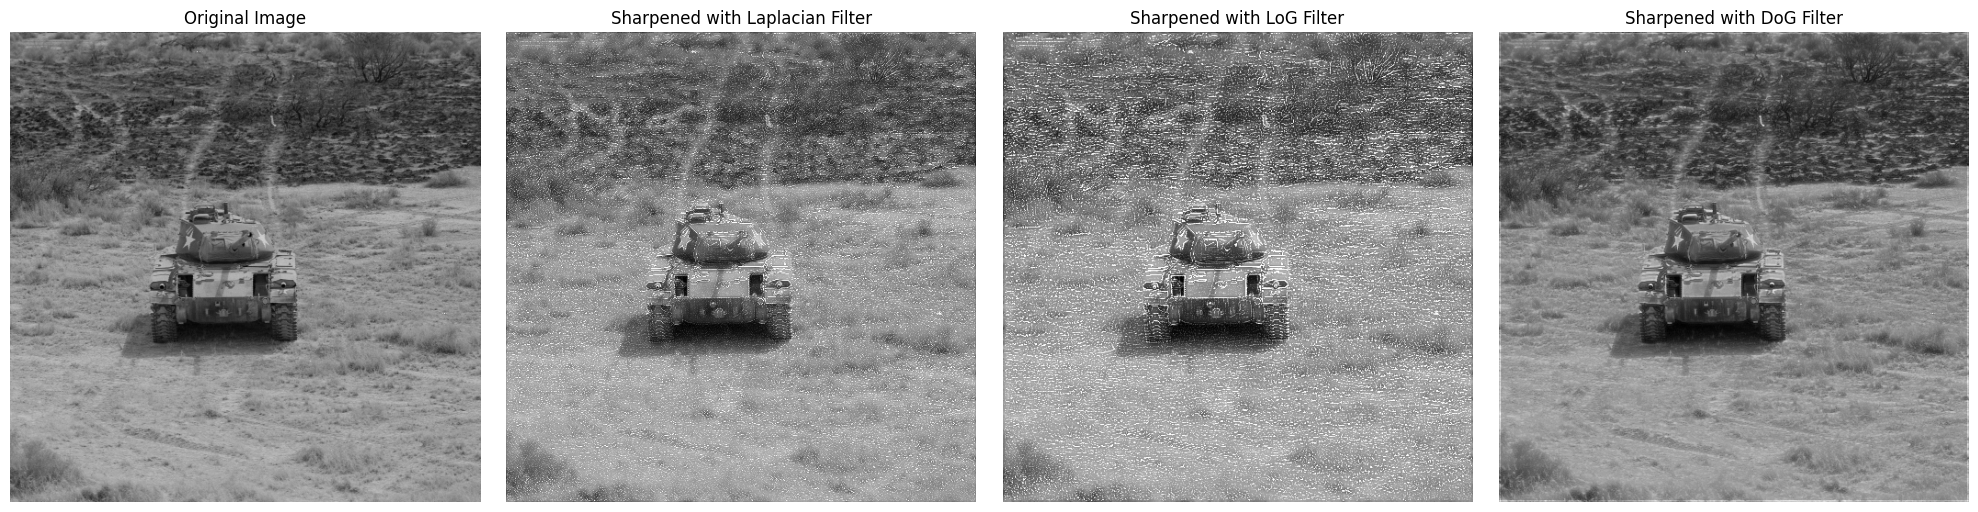

In [ ]:
def sharpen_with_filter(image, edge_image):
    sharpened = image + 2*edge_image
    return np.clip(sharpened, 0, 255)

sharpened_laplacian = sharpen_with_filter(image_array, laplacian_image)
sharpened_log = sharpen_with_filter(image_array, log_image)
sharpened_dog = sharpen_with_filter(image_array, dog_image)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(image_array, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(sharpened_laplacian, cmap='gray')
axs[1].set_title("Sharpened with Laplacian Filter")
axs[1].axis('off')

axs[2].imshow(sharpened_log, cmap='gray')
axs[2].set_title("Sharpened with LoG Filter")
axs[2].axis('off')

axs[3].imshow(sharpened_dog, cmap='gray')
axs[3].set_title("Sharpened with DoG Filter")
axs[3].axis('off')

plt.tight_layout()
plt.show()

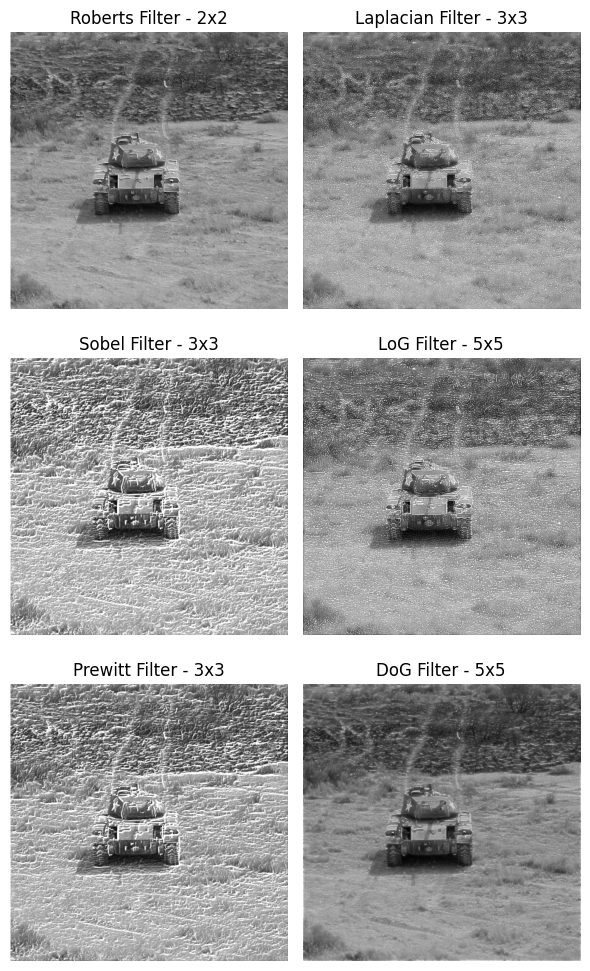

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(6, 10))
axs[0, 0].set_title("Roberts Filter - 2x2")
axs[0, 0].imshow(sharpened_roberts, cmap='gray')
axs[0, 0].axis('off')

axs[0, 1].set_title("Laplacian Filter - 3x3")
axs[0, 1].imshow(sharpened_laplacian, cmap='gray')
axs[0, 1].axis('off')

axs[1, 0].set_title("Sobel Filter - 3x3")
axs[1, 0].imshow(sharpened_sobel, cmap='gray')
axs[1, 0].axis('off')

axs[1, 1].set_title("LoG Filter - 5x5")
axs[1, 1].imshow(sharpened_log, cmap='gray')
axs[1, 1].axis('off')

axs[2, 0].set_title("Prewitt Filter - 3x3")
axs[2, 0].imshow(sharpened_prewitt, cmap='gray')
axs[2, 0].axis('off')

axs[2, 1].set_title("DoG Filter - 5x5")
axs[2, 1].imshow(sharpened_dog, cmap='gray')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()